# fig1


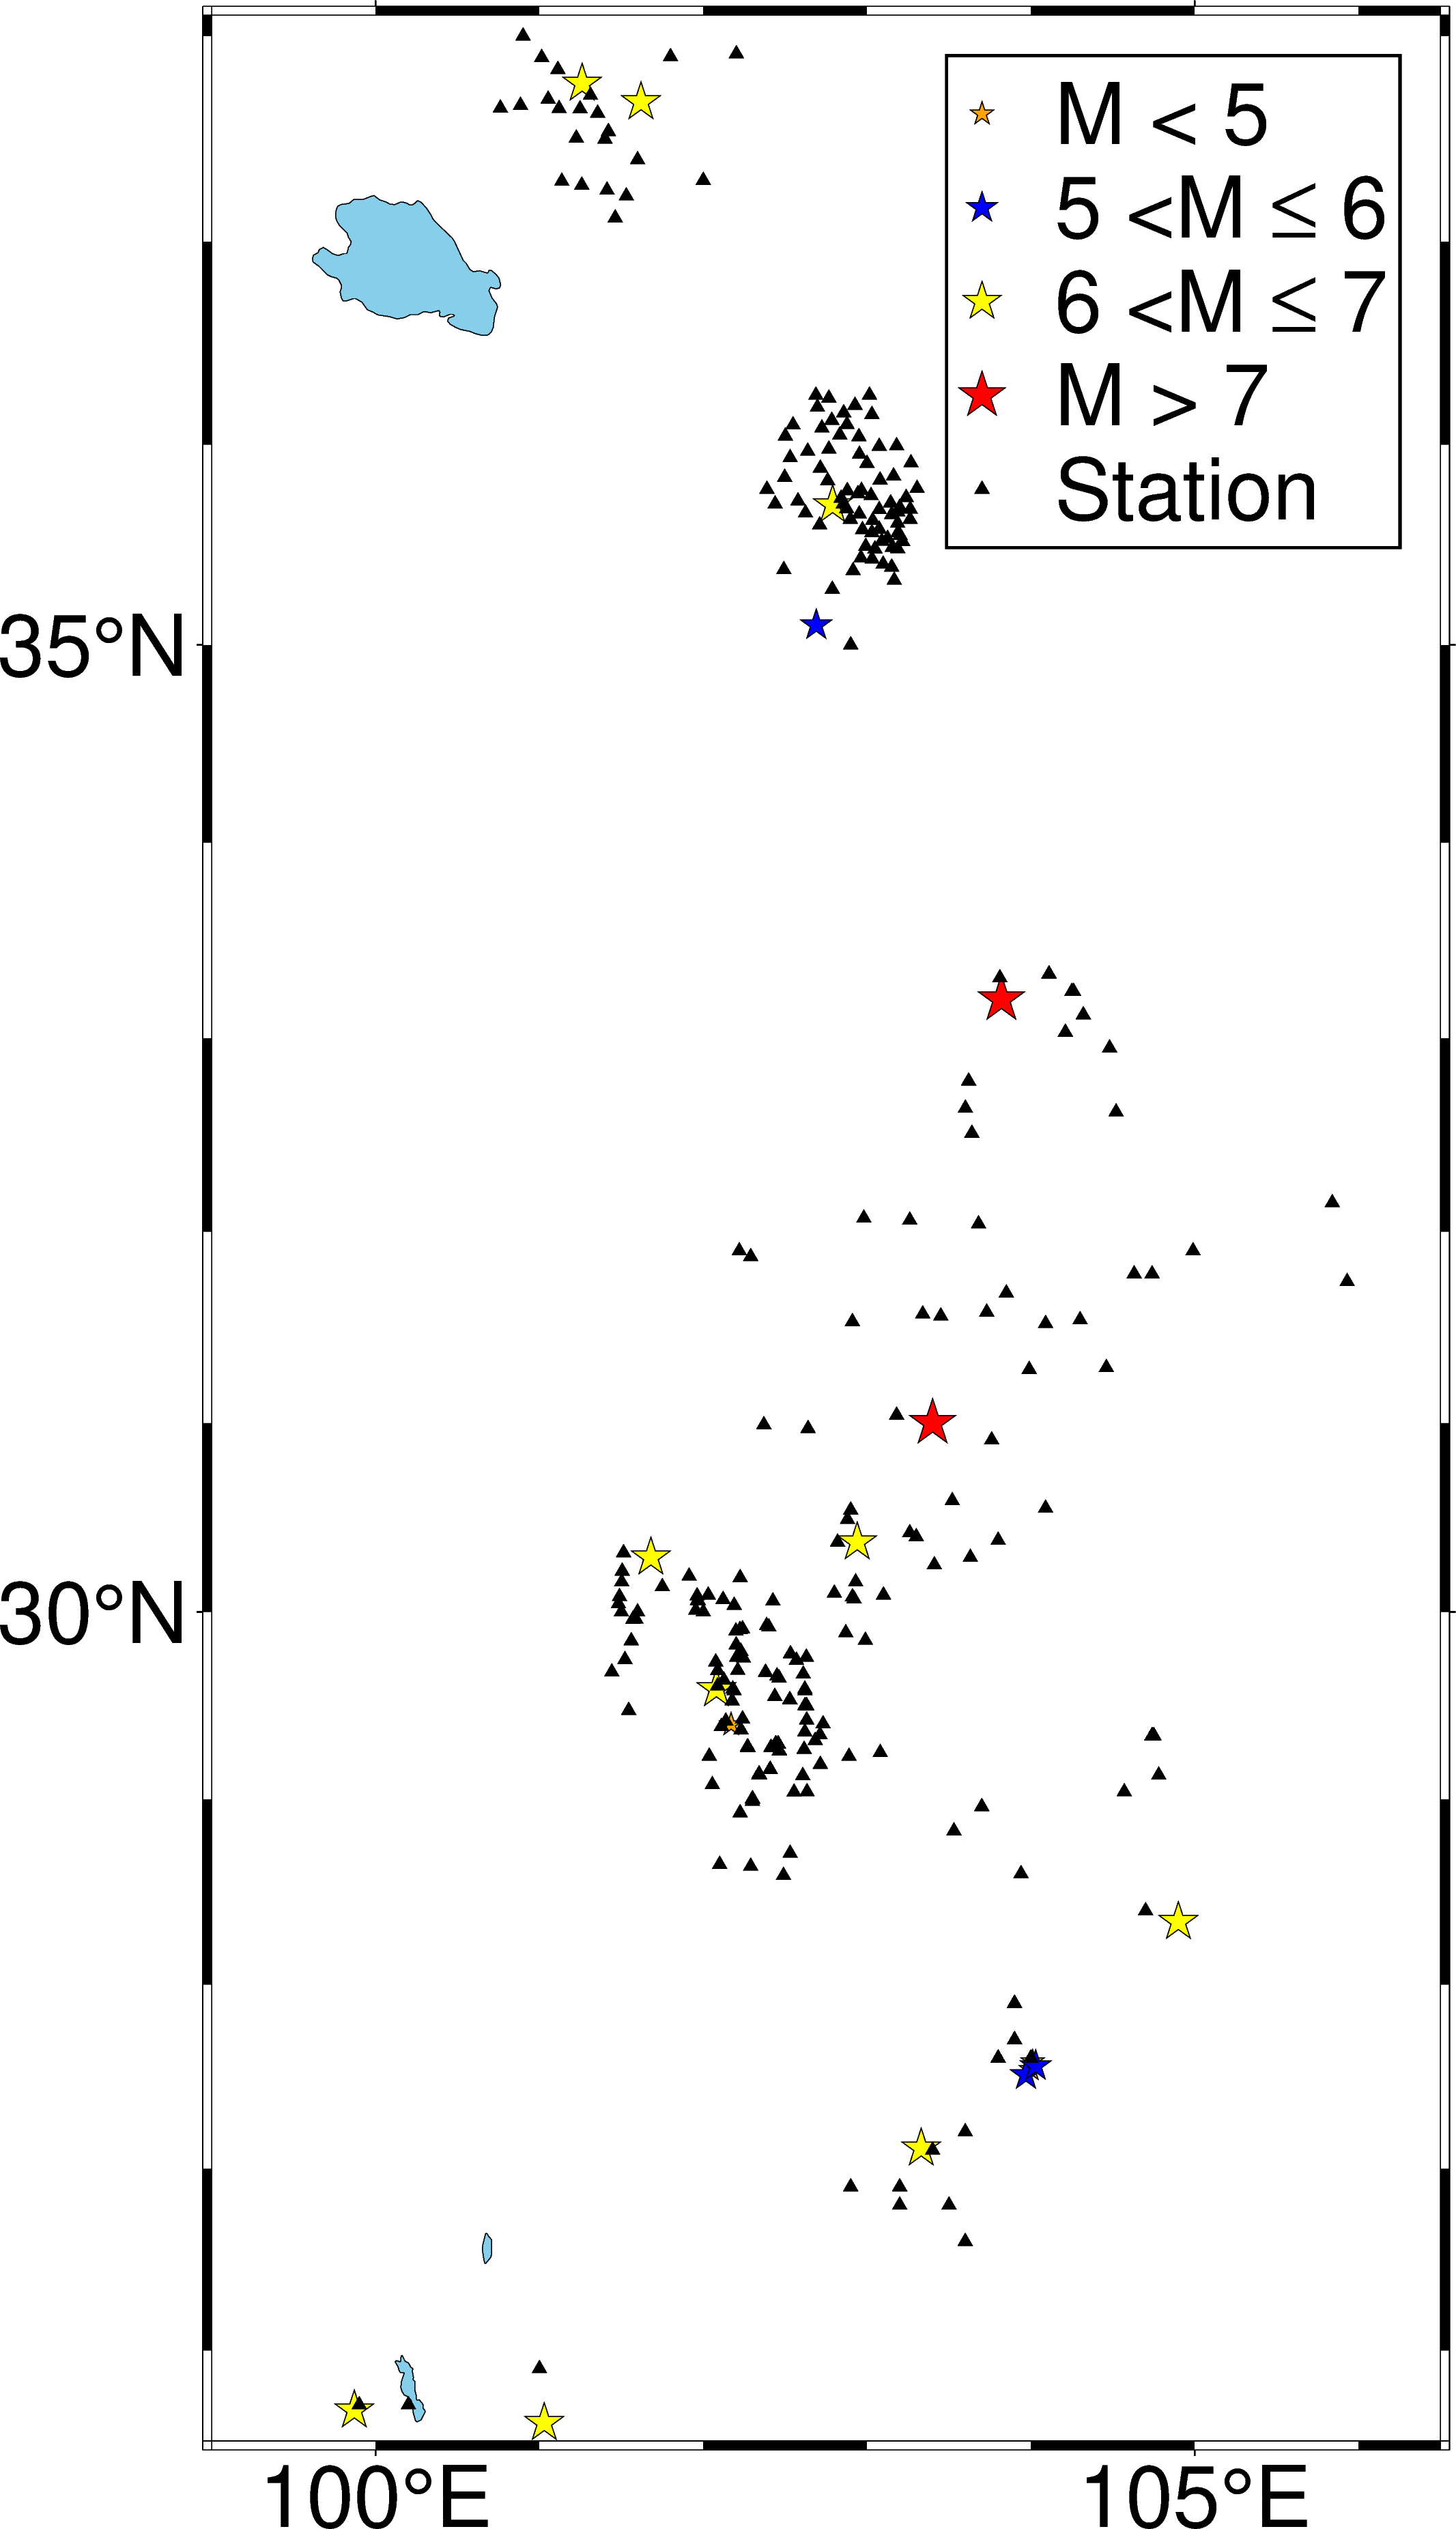

<Figure size 640x480 with 0 Axes>

In [2]:
import pygmt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pygmt.config(
    FONT="30p",
    FONT_ANNOT_PRIMARY="30p",
    FONT_LABEL="30p",
)

file_path = r"E:\烈度工作\PROGRAM\地震动参数表\py\station_distribute.xlsx"
data = pd.read_excel(file_path)
data_unique = data.drop_duplicates(subset=['earth_loti', 'earth_lati', 'Magnitude'])

fig = pygmt.Figure()
fig.basemap(region=[99, 106.5, 25.5, 38.1], projection="M6i", frame=True)
fig.coast(shorelines=True, borders=["1/1p,black", "2/0.8p,gray"], water="skyblue")

def plot_earthquakes(mag_min, mag_max, color, size, label):
    subset = data_unique[(data_unique['Magnitude'] >= mag_min) & (data_unique['Magnitude'] < mag_max)]
    if not subset.empty:
        fig.plot(
            x=subset['earth_loti'],
            y=subset['earth_lati'],
            style=f"a{size}c",
            pen="black",
            fill=color,
            label=label
        )

plot_earthquakes(-np.inf, 5, "orange", 0.3, "M < 5")
plot_earthquakes(5, 6, "blue", 0.4, "5 <M ≤ 6")
plot_earthquakes(6, 7, "yellow", 0.5, "6 <M ≤ 7")
plot_earthquakes(7, np.inf, "red", 0.6, "M > 7")

fig.plot(
    x=data['station_loti'],
    y=data['station_lati'],
    style="t0.2c",
    pen="black",
    fill="black",
    label="Station"
)

fig.legend(
    position="JTR+jTR+o0.5c/0.5c",
    box="+gwhite+p1p"
)
 
plt.savefig("earthquake_map_vector.svg", format="svg", bbox_inches='tight')  
plt.savefig("earthquake_map_vector.pdf", format="pdf", bbox_inches='tight')  

fig.show()


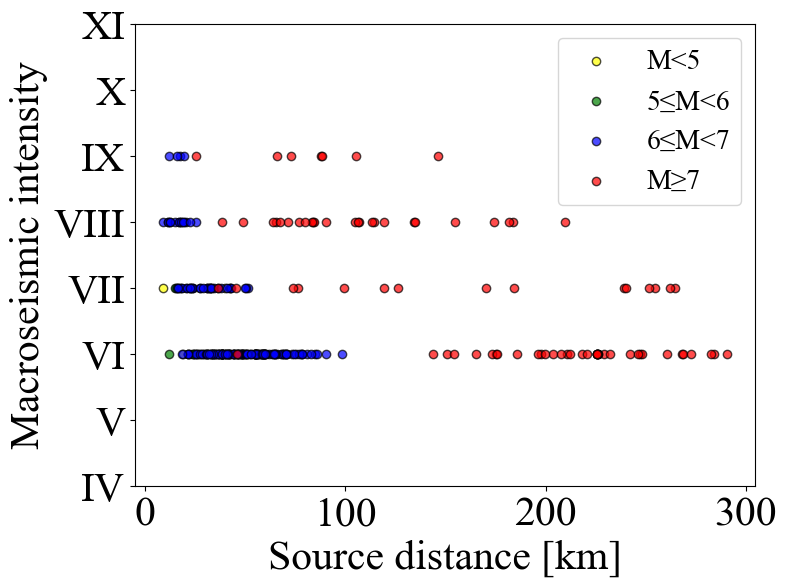

In [3]:

from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import pandas as pd

matplotlib.rcParams['backend'] = 'SVG'
plt.rcParams['axes.linewidth'] = 0.8

config = {
    "font.family": 'Times New Roman',
    "font.size": 30,
    "mathtext.fontset": 'stix',
}
rcParams.update(config)

file_path = r"E:\烈度工作\PROGRAM\地震动参数表\py\station_distribute.xlsx"
data = pd.read_excel(file_path)

magnitude_bins = [(0, 5, "yellow"), (5, 6, "green"), (6, 7, "blue"), (7, 10, "red")]
labels = ["M<5", "5≤M<6", "6≤M<7", "M≥7"]

intensity_levels = list(range(4, 12))
roman_numerals = ["IV", "V", "VI", "VII", "VIII", "IX", "X", "XI"]

plt.figure(figsize=(8, 6))

for (min_mag, max_mag, color), label in zip(magnitude_bins, labels):
    subset = data[(data["Magnitude"] >= min_mag) & (data["Magnitude"] < max_mag)]
    plt.scatter(subset["Source_distance"], subset["Assigned_Intensity"],
                color=color, label=label, edgecolors="black", alpha=0.7)

plt.xlabel("Source distance [km]", fontsize=30)
plt.ylabel("Macroseismic intensity", fontsize=30)

plt.yticks(intensity_levels, roman_numerals, fontsize=30)
plt.xticks(  fontsize=30)
plt.legend(fontsize=20)

plt.savefig("intensity_vs_distance.pdf", format="pdf", bbox_inches='tight')   
plt.savefig("intensity_vs_distance.svg", format="svg", bbox_inches='tight')   

plt.show()


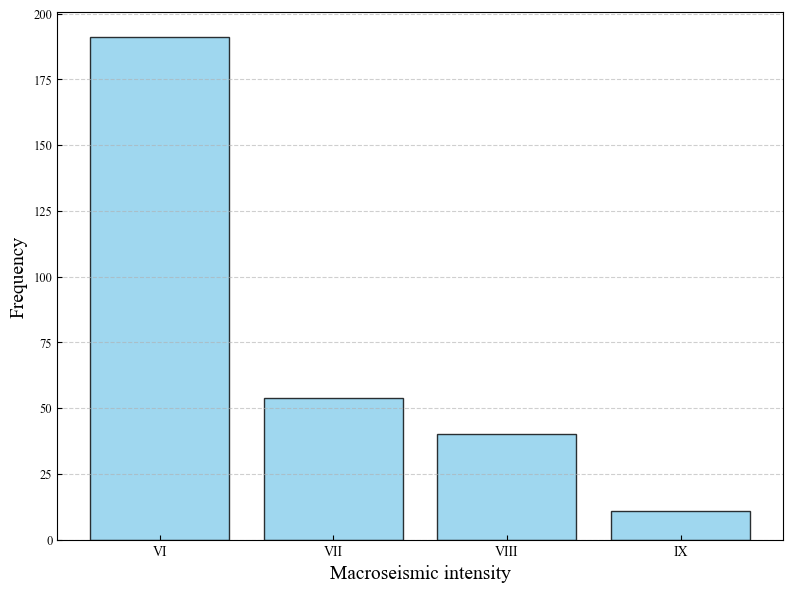

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import MultipleLocator
from matplotlib import colors

matplotlib.rcParams['backend'] = 'SVG'
plt.rcParams['axes.linewidth'] = 0.8

config = {
    "font.family": 'Times New Roman',
    "font.size": 9,
    "mathtext.fontset": 'stix',
}
rcParams.update(config)

file_path = r"E:\烈度工作\PROGRAM\地震动参数表\groundmotion_parameter.xlsx"
data = pd.read_excel(file_path)
y = data['Assigned_Intensity'] 

intensity_levels = {5: "V", 6: "VI", 7: "VII", 8: "VIII", 9: "IX", 10: "X", 11: "XI", 12: "XII"}

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Times New Roman"
plt.rcParams['text.usetex'] = False

plt.figure(figsize=(8, 6))

value_counts = y.value_counts().sort_index()

plt.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black', alpha=0.8)

plt.xlabel("Macroseismic intensity", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(value_counts.index, [intensity_levels[i] for i in value_counts.index], fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

plt.savefig("intensity_distribution.svg", format='svg', bbox_inches='tight') 
 


# fig 2

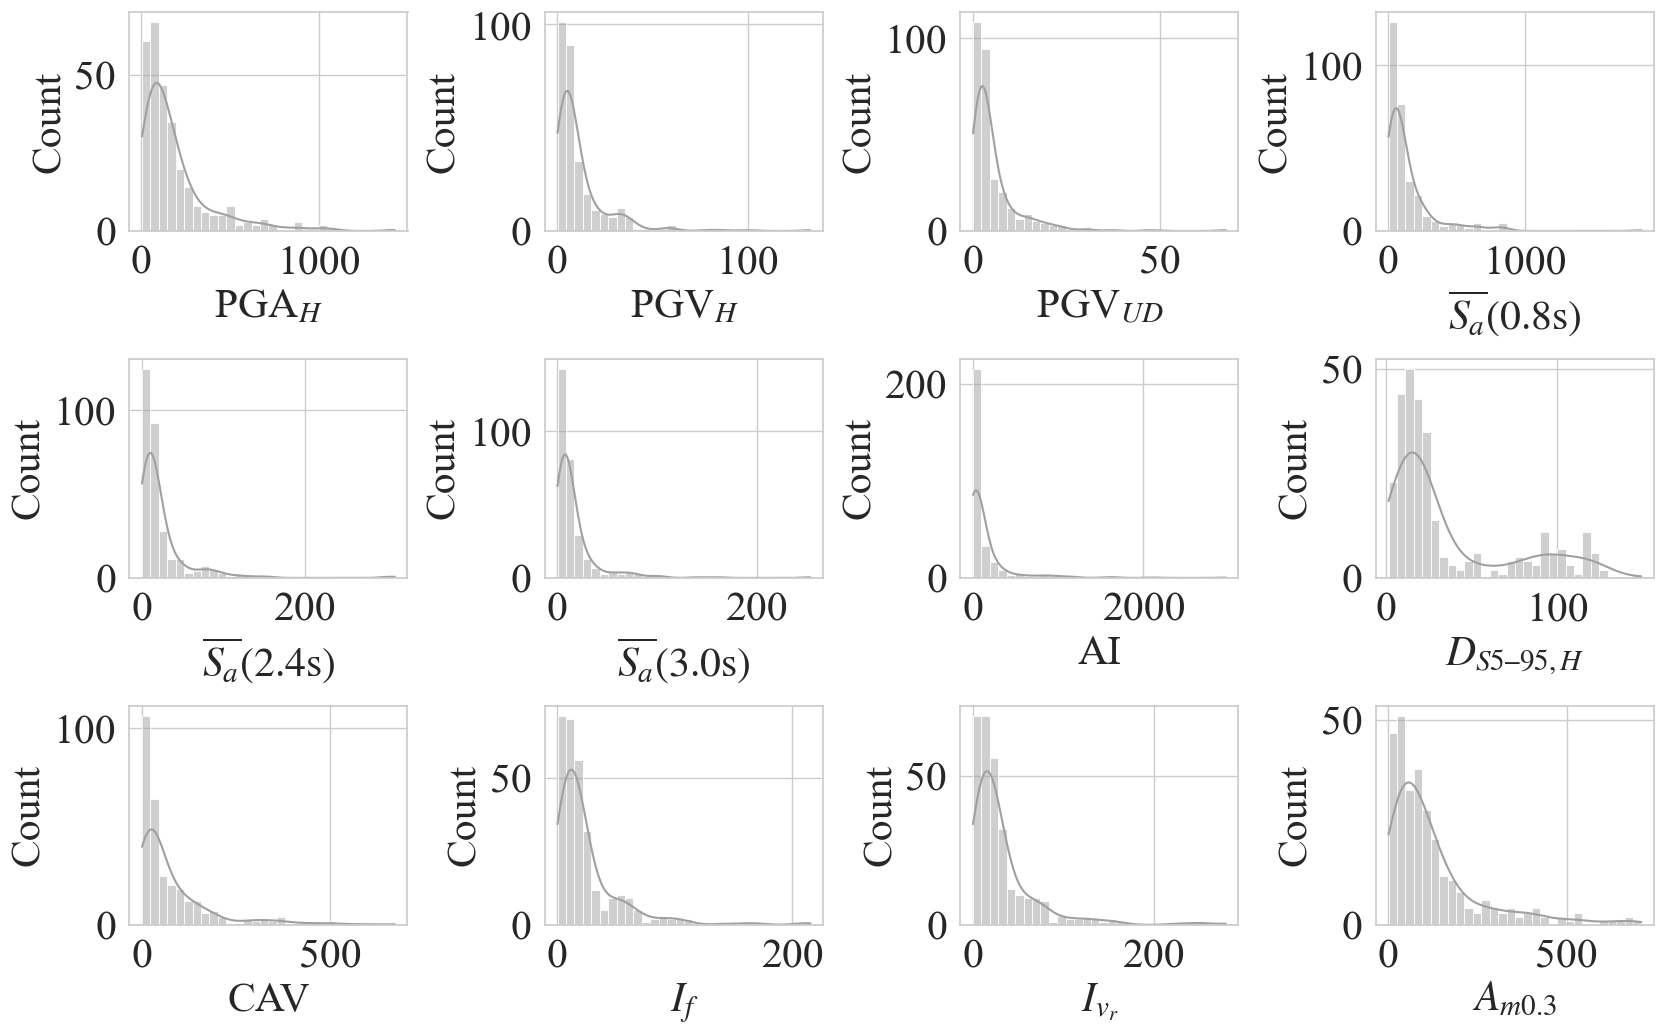

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
config = {
    "font.family": 'Times New Roman',
    "font.size": 20,
    "mathtext.fontset": 'stix',
}
rcParams.update(config)
plt.rcParams['axes.linewidth'] = 0.8
file_path = r"E:\烈度工作\PROGRAM\地震动参数表\groundmotion_parameter.xlsx"
data = pd.read_excel(file_path)

IM_list = ['PGA_H', 'PGV_H', 'PGV_UD', 'Sa0.8', 'Sa2.4', 'Sa3.0', 'AI', 'Dur_H595', 'Cav', 'I_f', 'I_v_r', 'Am03']
IM_labels = {
    'PGA_H': r'PGA$_H$',
    'PGV_H': r'PGV$_H$',
    'PGV_UD': r'PGV$_{UD}$',
    'Sa0.8': r'$ \overline{S_a}( 0.8\mathrm{s})$',
    'Sa2.4': r'$ \overline{S_a}( 2.4\mathrm{s})$',
    'Sa3.0': r'$ \overline{S_a}( 3.0\mathrm{s})$',
    'AI': r'AI',
    'Dur_H595': r'$D_{S5\text{–}95,H}$ ',
    'Cav': r'CAV',
    'I_f': r'$I_f$',
    'I_v_r': r'$I_{v_r}$',
    'Am03': r'$A_{m0.3}$'
}
y = data['Assigned_Intensity']
X = data.drop(columns=['Assigned_Intensity', 'Dur_EW595', 'Dur_NS595', 'Dur_NS575', 'Dur_EW575'])

sns.set(style='whitegrid', font_scale=1.0)
n_col = 4
n_row = 3
fig, axes = plt.subplots(n_row, n_col, figsize=(4.2 * n_col, 3.5 * n_row))

for idx, im in enumerate(IM_list):
    row = idx // n_col
    col = idx % n_col
    ax = axes[row, col]

    sns.histplot(X[im], kde=True, bins=30, ax=ax, color='#A0A0A0')
    ax.set_xlabel(IM_labels[im], fontsize=30)
    ax.set_ylabel('Count', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Times New Roman"
plt.rcParams['text.usetex'] = False
 
plt.rcParams['axes.linewidth'] = 0.8
plt.tight_layout()

plt.savefig("IM_distribution.svg", format='svg', bbox_inches='tight')

plt.show()


# fig 3

C:\Users\ZhangTe\AppData\Local\Temp\ipykernel_7248\4261174226.py:139: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(left=0.15, right=0.82, top=0.95, bottom=0.1, wspace=0.3, hspace=0.3)
C:\Users\ZhangTe\AppData\Local\Temp\ipykernel_7248\4261174226.py:140: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 0.88, 1])


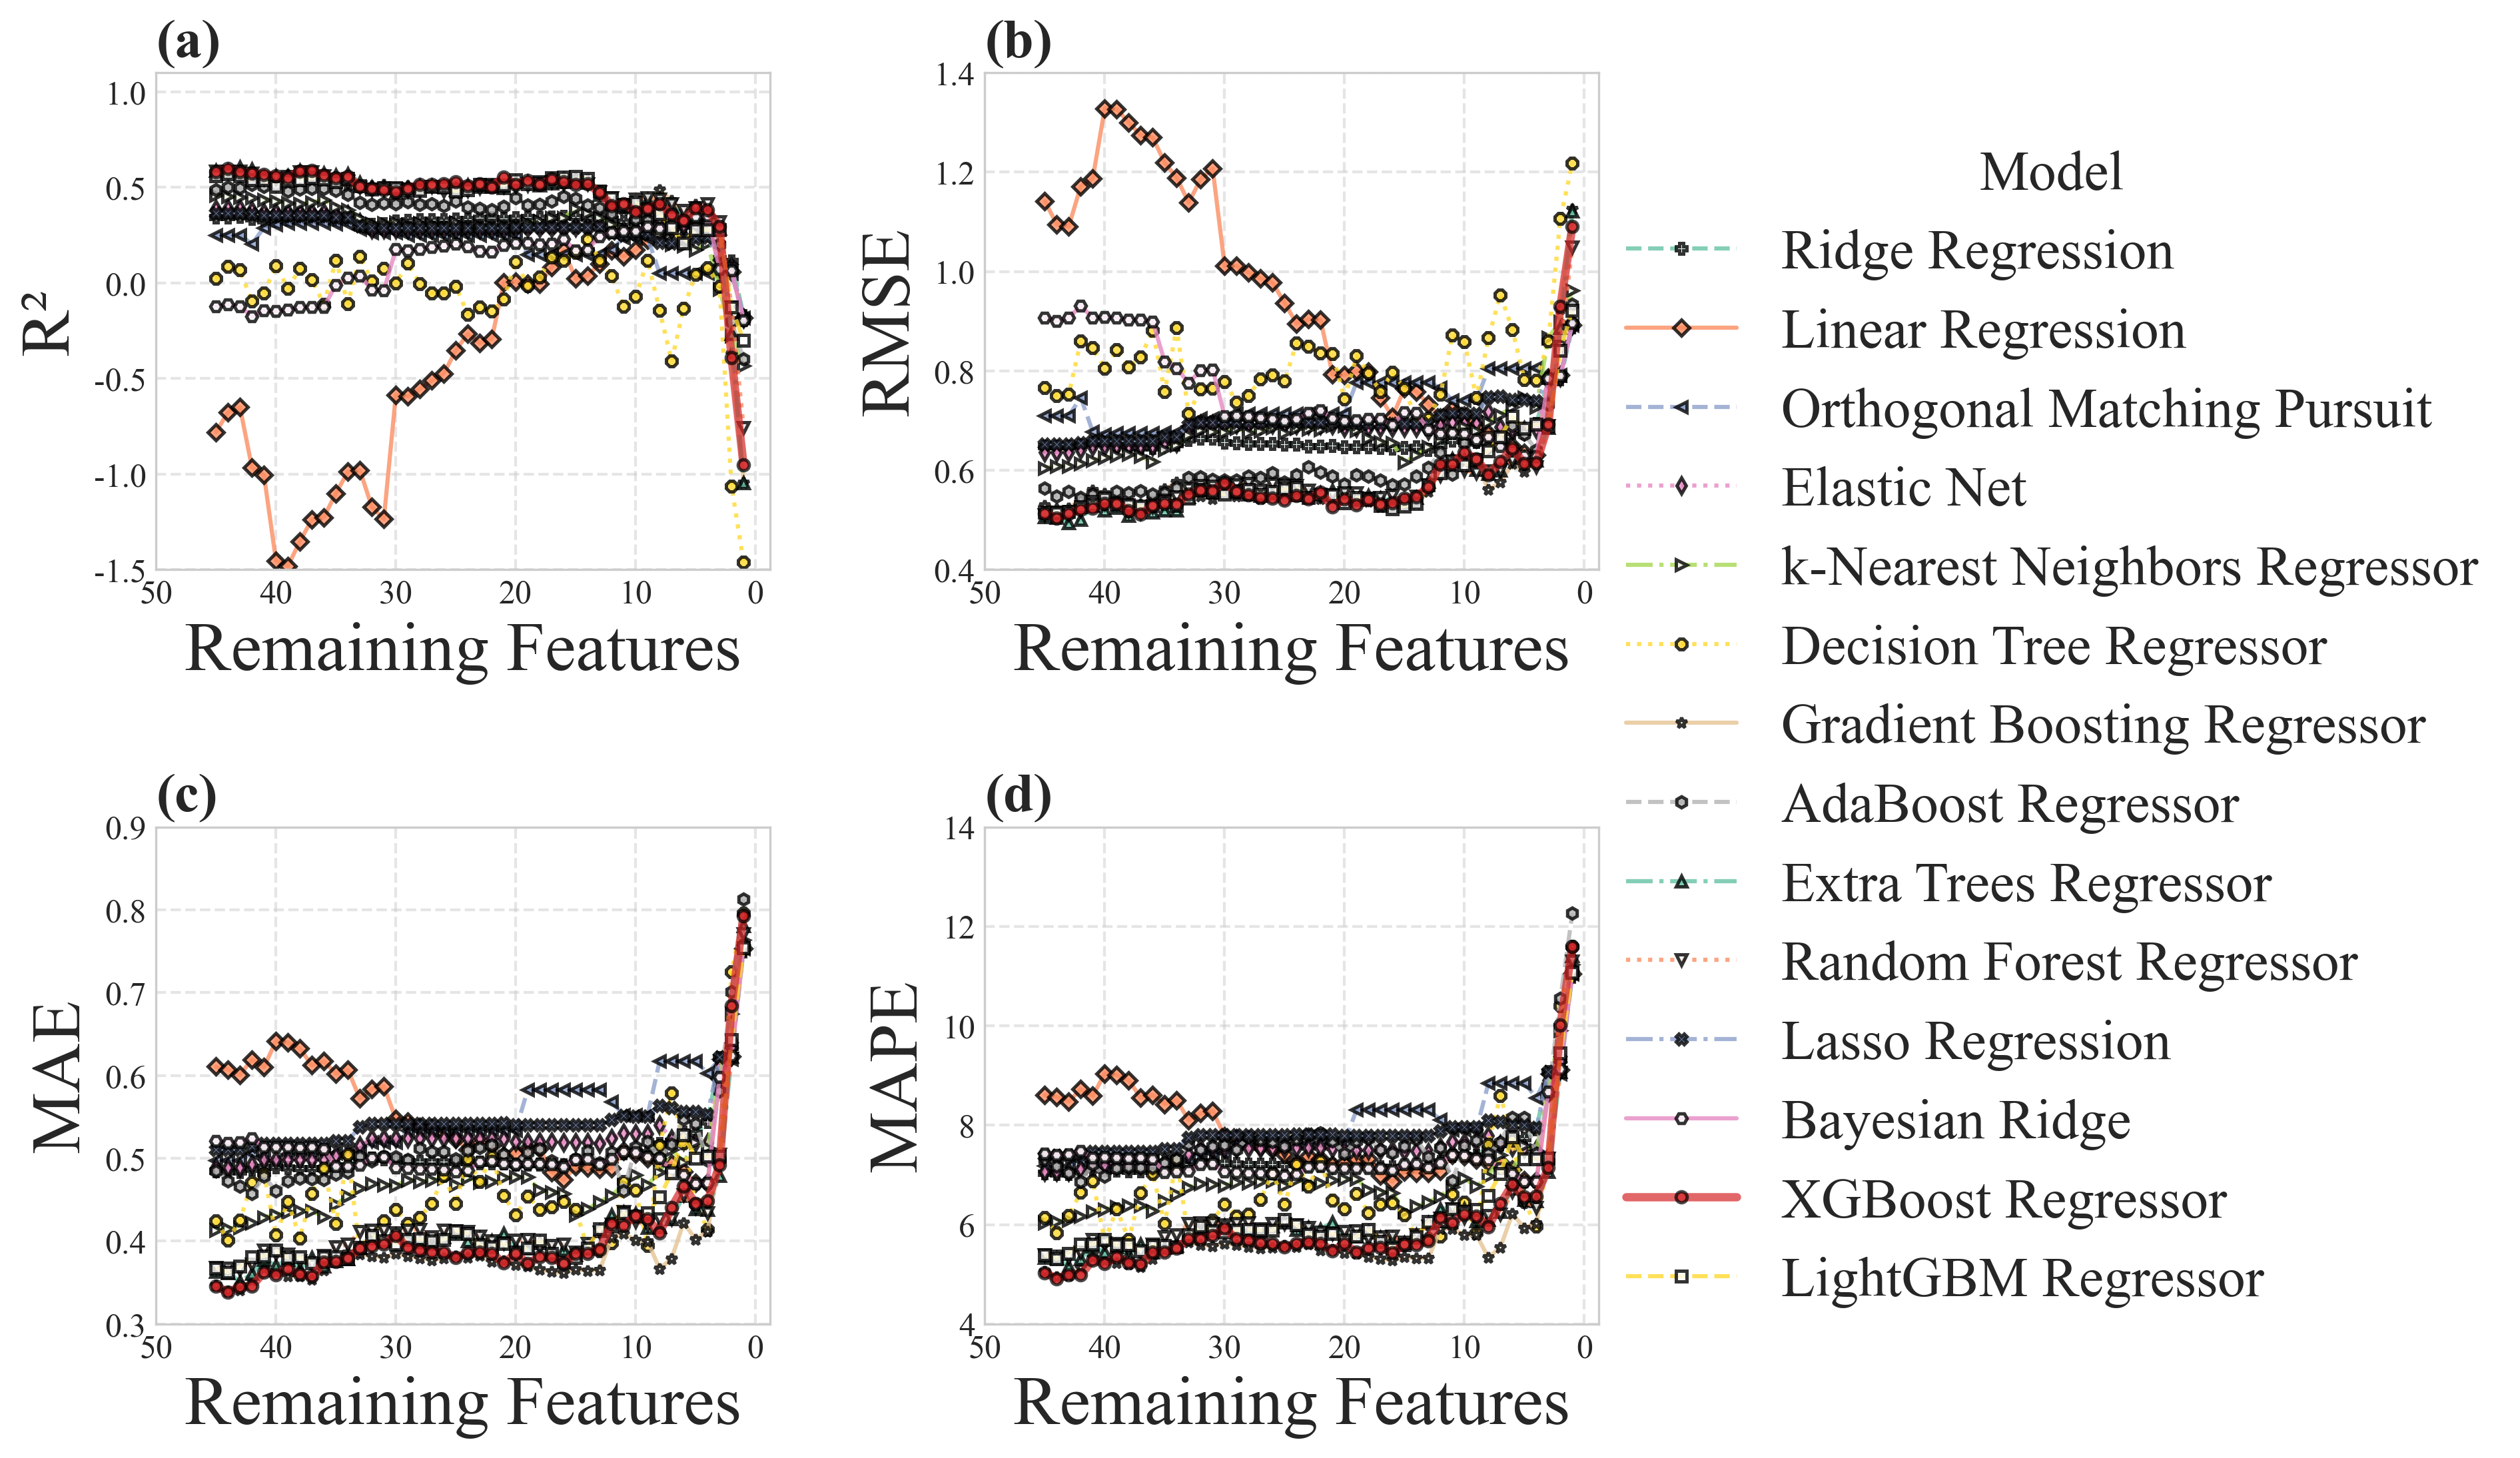

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

 
config = {
    "font.family": 'Times New Roman',
    "font.size": 30,
    "mathtext.fontset": 'stix',
}
rcParams.update(config)
plt.rcParams['axes.linewidth'] = 0.8

 
highlight_color = '#D62728'  


ylabel_map = {
    "R^2 (mean)": "R²",
    "RMSE (mean)": "RMSE",
    "MAE (mean)": "MAE",
    "MAPE (mean)": "MAPE"
}

custom_yaxis_settings = {
    "R^2 (mean)": {
        "ylim": (-1.5, 1.1),
        "yticks": [-1.5, -1.0, -0.5, 0, 0.5, 1.0],
        "formatter": "{:.1f}"
    },
    "RMSE (mean)": {
        "ylim": (0.4, 1.4),
        "yticks": [0.4, 0.6, 0.8, 1.0, 1.2, 1.4],
        "formatter": "{:.1f}"
    },
    "MAE (mean)": {
        "ylim": (0.3, 0.9),
        "yticks": [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        "formatter": "{:.1f}"
    },
    "MAPE (mean)": {
        "ylim": (4, 14),
        "yticks": [4, 6, 8, 10, 12, 14],
        "formatter": "{:.0f}"
    }
}


df = pd.read_csv(r'E:\jupyternotebook\marco\10duto1accauracy_1_chagnge_elstic_model_performance_with_acc.csv')
df = df.sort_values(by="Remaining Features", ascending=False)
models = df["Model"].unique()


style_map = {
    'XGBoost Regressor': ('o', '-', True),
    'LightGBM Regressor': ('s', '--', False),
    'Extra Trees Regressor': ('^', '-.', True),
    'Random Forest Regressor': ('v', ':', False),
    'Linear Regression': ('D', '-', True),
    'Ridge Regression': ('P', '--', False),
    'Bayesian Ridge': ('H', '-', False),
    'Lasso Regression': ('X', '-.', True),
    'Elastic Net': ('d', ':', True),
    'Orthogonal Matching Pursuit': ('<', '--', True),
    'k-Nearest Neighbors Regressor': ('>', '-.', False),
    'Decision Tree Regressor': ('8', ':', True),
    'Gradient Boosting Regressor': ('*', '-', False),
    'AdaBoost Regressor': ('h', '--', True)
}


palette = sns.color_palette("Set2", len(models))
color_map = {model: palette[i] for i, model in enumerate(models)}
color_map["XGBoost Regressor"] = highlight_color

highlight_models = ["XGBoost Regressor"]


metrics = [
    ("R^2 (mean)", "R² Score (Mean)", None),
    ("RMSE (mean)", "Root Mean Squared Error (Mean)", None),
    ("MAE (mean)", "Mean Absolute Error (Mean)", None),
    ("MAPE (mean)", "Mean Absolute Percentage Error (Mean)", None),
]

fig, axs = plt.subplots(2, 2, figsize=(10, 8), dpi=300, constrained_layout=True)
axs = axs.flatten()
subplot_labels = ['(a)', '(b)', '(c)', '(d)']

for i, (metric, ylabel, _) in enumerate(metrics):
    ax = axs[i]
    for model in models:
        model_data = df[df["Model"] == model]
        marker, linestyle, filled = style_map.get(model, ('o', '-', True))
        ax.plot(
            model_data["Remaining Features"],
            model_data[metric],
            label=model,
            marker=marker,
            linestyle=linestyle,
            markersize=4,
            linewidth=3.0 if model in highlight_models else 1.5,
            markerfacecolor='white' if not filled else None,
            markeredgecolor='black',
            markeredgewidth=1.2,
            alpha=0.7 if model in highlight_models else 0.8,
            zorder=10 if model in highlight_models else 2,
            color=color_map[model]
        )

    ax.set_xlabel("Remaining Features", fontsize=25)
    ax.set_ylabel(ylabel_map.get(metric, ylabel), fontsize=25)
    ax.set_title(subplot_labels[i], loc='left', fontsize=20, fontweight='bold')
    ax.invert_xaxis()
    ax.grid(alpha=0.5, linestyle="--")
    ax.tick_params(axis='both', labelsize=12)
    ax.set_xticks([50, 40, 30, 20, 10, 0])

    yconf = custom_yaxis_settings.get(metric)
    if yconf:
        ax.set_ylim(yconf["ylim"])
        ax.set_yticks(yconf["yticks"])
        ax.set_yticklabels([yconf["formatter"].format(t) for t in yconf["yticks"]])


handles, labels = axs[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc='center right',
    bbox_to_anchor=(1.3, 0.5),
    fontsize=20,
    frameon=False,
    title='Model',
    title_fontsize=20,
    ncol=1
)

plt.subplots_adjust(left=0.15, right=0.82, top=0.95, bottom=0.1, wspace=0.3, hspace=0.3)
plt.tight_layout(rect=[0, 0, 0.88, 1])
# plt.savefig("4metrics_vs_features.pdf", format='pdf', bbox_inches='tight')
plt.savefig("4metrics_vs_features.svg", format='svg', bbox_inches='tight')
plt.show()


# fig 4

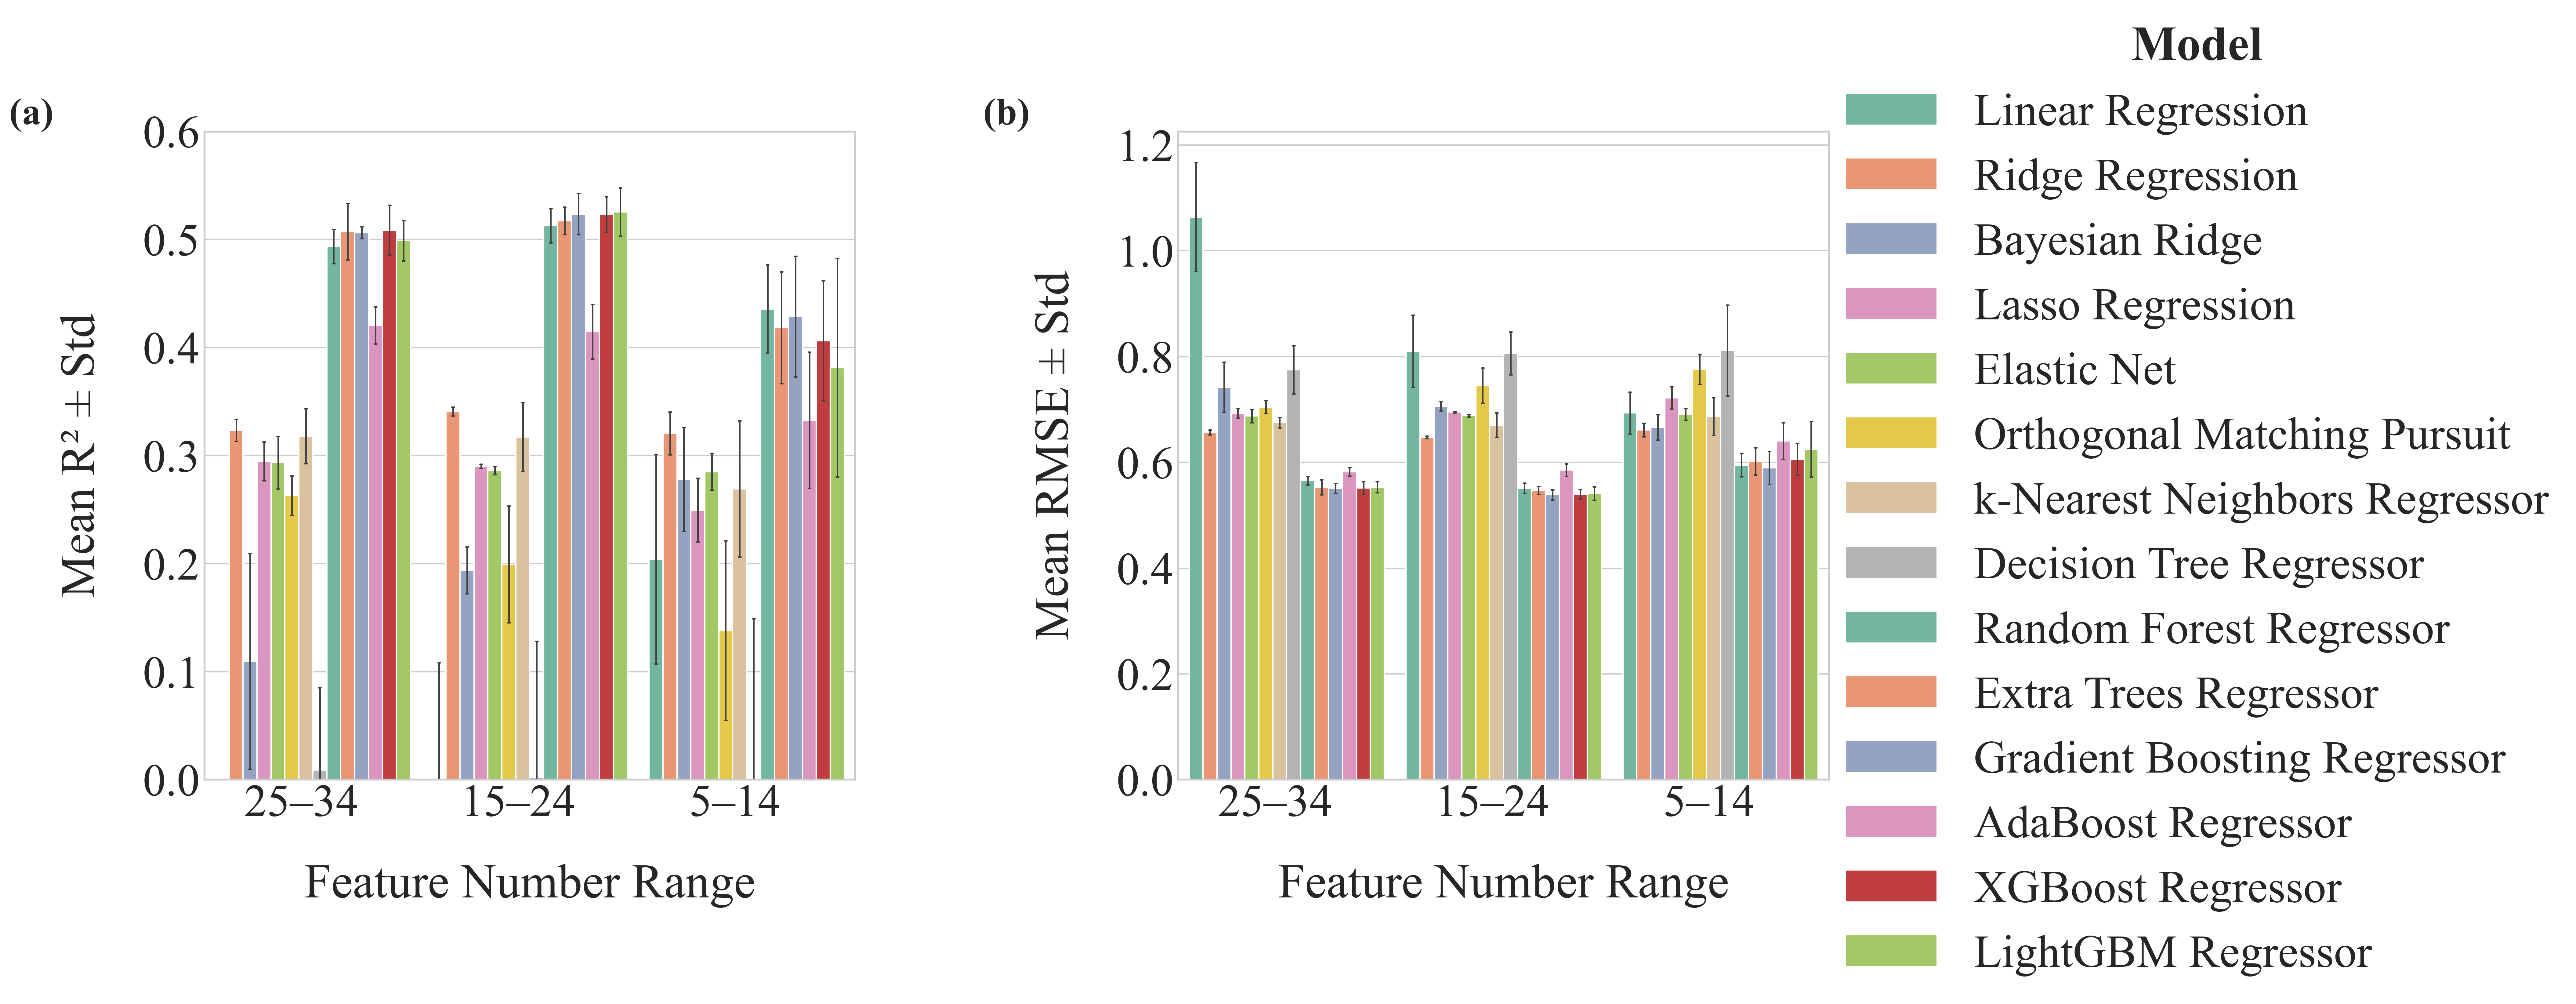

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 38,   
    "axes.titlesize": 38,
    "axes.labelsize": 38,
    "xtick.labelsize": 36,
    "ytick.labelsize": 36,
    "legend.fontsize": 36,
    "legend.title_fontsize": 38,
    "axes.linewidth": 1.5,
})


df = pd.read_csv(r"E:\jupyternotebook\marco\10duto1accauracy_1_chagnge_elstic_model_performance_with_acc.csv")

bins = [(25, 34), (15, 24), (5, 14)]
bin_labels = ['25–34  ', '15–24  ', '5–14  ']
def map_feature_range(x):
    for label, (low, high) in zip(bin_labels, bins):
        if low <= x <= high:
            return label
    return None

df['Feature Range'] = df['Remaining Features'].apply(map_feature_range)
df = df.dropna(subset=['Feature Range'])

highlight_model = "XGBoost Regressor"
base_color = '#d62728'   

other_models = [m for m in df['Model'].unique() if m != highlight_model]
base_palette = sns.color_palette("Set2", n_colors=len(other_models))   
custom_palette = {highlight_model: base_color}
custom_palette.update({model: color for model, color in zip(other_models, base_palette)})

fig, axes = plt.subplots(1, 2, figsize=(28, 10), dpi=300)

sns.barplot(
    data=df,
    x='Feature Range',
    y='R^2 (mean)',
    hue='Model',
    palette=custom_palette,
    errorbar='sd',
    capsize=0.15,
    err_kws={'linewidth': 1.2},
    width=0.9,
    ax=axes[0]
)
axes[0].set_xlabel('Feature Number Range', labelpad=30)
axes[0].set_ylabel('Mean R² ± Std', labelpad=30)
axes[0].set_ylim([0, 0.6])
axes[0].text(-0.3, 1.05, '(a)', transform=axes[0].transAxes,
             fontsize=30, fontweight='bold', va='top', ha='left')
axes[0].legend_.remove()

# 图2 - RMSE
sns.barplot(
    data=df,
    x='Feature Range',
    y='RMSE (mean)',
    hue='Model',
    palette=custom_palette,
    errorbar='sd',
    capsize=0.15,
    err_kws={'linewidth': 1.2},
    width=0.9,
    ax=axes[1]
)
axes[1].set_xlabel('Feature Number Range', labelpad=30)
axes[1].set_ylabel('Mean RMSE ± Std', labelpad=30)
axes[1].text(-0.3, 1.05, '(b)', transform=axes[1].transAxes,
             fontsize=30, fontweight='bold', va='top', ha='left')
axes[1].legend_.remove()

for ax in axes:
    ax.tick_params(labelsize=25)

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title='Model',
    loc='center left',
    bbox_to_anchor=(0.77 , 0.5),
    ncol=1,
    frameon=False,
    prop={'size': 36},
    title_fontproperties={'size': 38, 'weight': 'bold'}
)

for ax in axes:
    ax.tick_params(labelsize=36)
    
# 布局调整，预留 legend 空间
plt.tight_layout(rect=[0.02, 0, 0.8, 1])
plt.savefig("highlight_xgboost_with_distinct_others.pdf", bbox_inches='tight')
plt.show()


# fig5

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False   
file_path = r"E:\烈度工作\PROGRAM\地震动参数表\groundmotion_parameter.xlsx"
data = pd.read_excel(file_path)

X = data.drop(columns=['Assigned_Intensity', 'Dur_EW595', 'Dur_NS595', 'Dur_NS575', 'Dur_EW575'])
y = data['Assigned_Intensity']  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

xgb_model = XGBRegressor(
    objective='reg:squarederror', 
    colsample_bytree=0.7, 
    learning_rate=0.05, 
    max_depth=10, 
    n_estimators=100, 
    subsample=0.8, 
    random_state=42
)

cv_results_all = cross_validate(xgb_model, X_train, y_train, cv=5, scoring=['r2', 'neg_mean_squared_error'], return_train_score=True)
baseline_r2 = np.mean(cv_results_all['test_r2'])
baseline_mse = -np.mean(cv_results_all['test_neg_mean_squared_error'])

num_features = list(range(1, X.shape[1], 1)) 
r2_scores, mse_scores = [], []

for n in num_features:
    rfe = RFE(estimator=xgb_model, n_features_to_select=n, step=1)
    X_train_rfe = rfe.fit_transform(X_train, y_train)

    cv_results_rfe = cross_validate(xgb_model, X_train_rfe, y_train, cv=5, scoring=['r2', 'neg_mean_squared_error'], return_train_score=True)
    r2_scores.append(np.mean(cv_results_rfe['test_r2']))
    mse_scores.append(-np.mean(cv_results_rfe['test_neg_mean_squared_error']))


best_n_features = num_features[np.argmax(r2_scores)]
print(f"最优特征数量: {best_n_features}")

best_n_features_idx = np.argmax(r2_scores)  
best_n_features = num_features[best_n_features_idx]

rfe = RFE(estimator=xgb_model, n_features_to_select=best_n_features, step=1)
rfe.fit(X_train, y_train)
y_pred = rfe.predict(X_test)

feature_names = X.columns  
selected_features = feature_names[rfe.support_]  
print(f"最优特征数量: {best_n_features}")
print(f"最优 R² 值: {r2_scores[best_n_features_idx]:.4f}")
print(f"最优 MSE 值: {mse_scores[best_n_features_idx]:.4f}")
print(f"最优特征名称: {list(selected_features)}")


最优特征数量: 15
最优特征数量: 15
最优 R² 值: 0.6771
最优 MSE 值: 0.2372
最优特征名称: ['Dur_H595', 'DI', 'Caa', 'I_z', 'I_ch', 'Sa1.4', 'Sa1.8', 'Sa2.4', 'Sa2.6', 'Sa2.8', 'Sa3.0', 'PGV_UD', 'PGV_HE', 'PGA_H', 'PGV_H']


In [43]:
selected_features

Index(['Dur_H595', 'DI', 'Caa', 'I_z', 'I_ch', 'Sa1.4', 'Sa1.8', 'Sa2.4',
       'Sa2.6', 'Sa2.8', 'Sa3.0', 'PGV_UD', 'PGV_HE', 'PGA_H', 'PGV_H'],
      dtype='object')

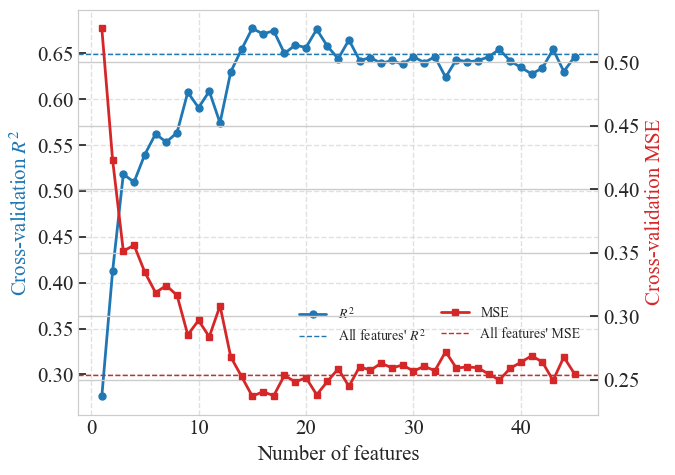

In [44]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

 
rcParams.update({
    "font.family": 'Times New Roman',
    "font.size": 15,   
    "mathtext.fontset": 'stix',
    "svg.fonttype": "path",   
})
fontsize = 15

fig, ax1 = plt.subplots(figsize=(7, 5))  

ax1.set_xlabel("Number of features", fontsize=fontsize)
ax1.set_ylabel("Cross-validation $R^2$", fontsize=fontsize, color='tab:blue')
ax1.plot(num_features, r2_scores, marker="o", color="tab:blue", label=r"$R^2$", linewidth=2, markersize=5)
ax1.axhline(baseline_r2, linestyle="--", color="tab:blue", label=r"All features' $R^2$", linewidth=1)

ax2 = ax1.twinx()
ax2.set_ylabel("Cross-validation MSE", fontsize=fontsize, color='tab:red')
ax2.plot(num_features, mse_scores, marker="s", color="tab:red", label="MSE", linewidth=2, markersize=5)
ax2.axhline(baseline_mse, linestyle="--", color="tab:red", label="All features' MSE", linewidth=1)
ax1.tick_params(axis='both', labelsize=fontsize)
ax2.tick_params(axis='both', labelsize=fontsize)

ax1.legend(loc="upper left", bbox_to_anchor=(0.4, 0.3), fontsize=10, frameon=False)
ax2.legend(loc="upper right", bbox_to_anchor=(0.99, 0.3), fontsize=10, frameon=False)


ax1.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("feature_vs_performance.svg", format='svg', bbox_inches='tight')

plt.show()


# fig 6

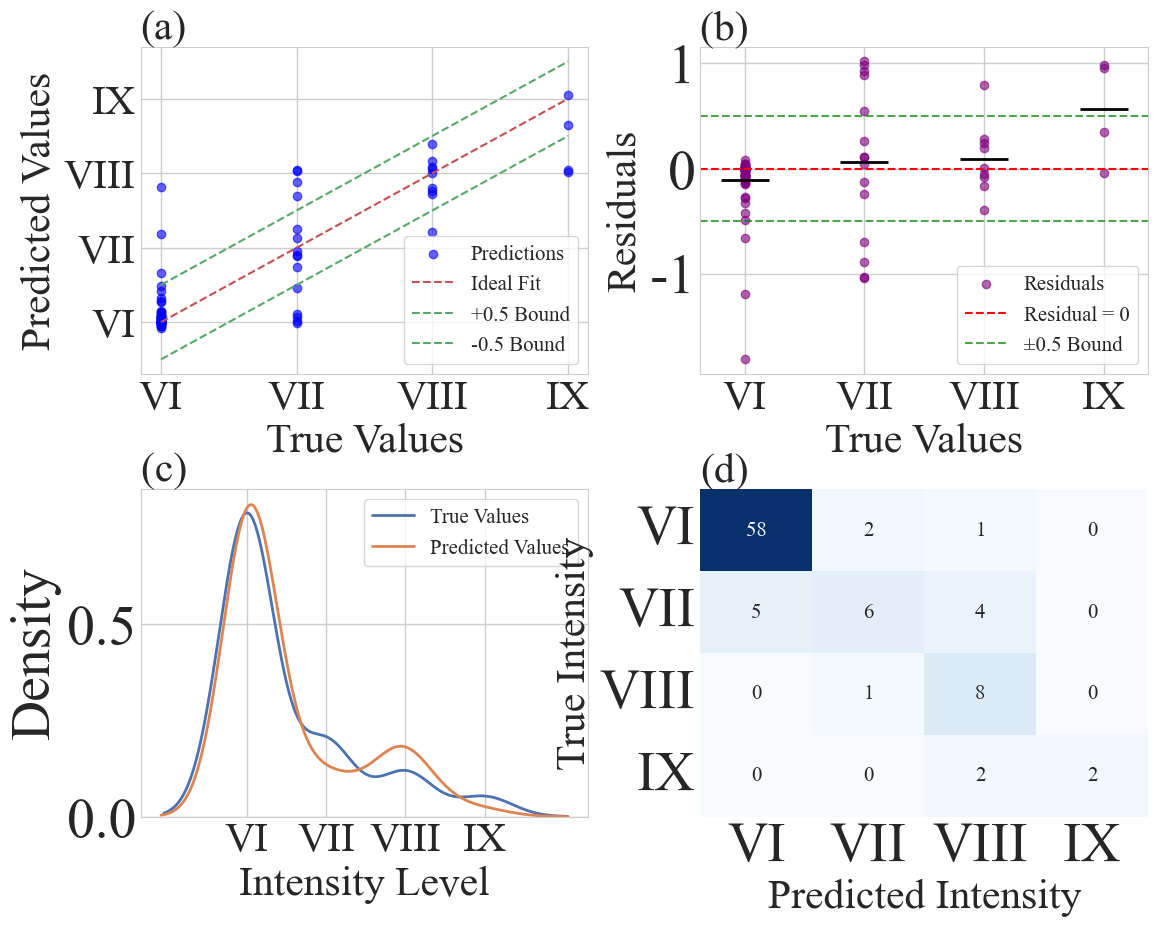

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor

file_path = r"E:\烈度工作\PROGRAM\地震动参数表\groundmotion_parameter.xlsx"
data = pd.read_excel(file_path)

X = data.drop(columns=['Assigned_Intensity', 'Dur_EW595', 'Dur_NS595', 'Dur_NS575', 'Dur_EW575'])
y = data['Assigned_Intensity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
best_n_features = 10  
rfe = RFE(estimator=xgb_model, n_features_to_select=best_n_features, step=1)
rfe.fit(X_train, y_train)
y_pred = rfe.predict(X_test)

def to_roman(num):
    roman_numerals = {1: 'I', 2: 'II', 3: 'III', 4: 'IV', 5: 'V', 6: 'VI', 7: 'VII',
                      8: 'VIII', 9: 'IX', 10: 'X', 11: 'XI', 12: 'XII'}
    return roman_numerals.get(int(round(num)), str(num))


tick_values = sorted(np.unique(np.round(y_test)))

fig, axes = plt.subplots(2, 2, figsize=(13, 10))
plt.subplots_adjust(hspace=0.35, wspace=0.25)

ax = axes[0, 0]
ax.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predictions')
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Ideal Fit")
ax.plot([min(y_test), max(y_test)], [min(y_test)+0.5, max(y_test)+0.5], 'g--', label="+0.5 Bound")
ax.plot([min(y_test), max(y_test)], [min(y_test)-0.5, max(y_test)-0.5], 'g--', label="-0.5 Bound")
ax.set_xticks(tick_values)
ax.set_yticks(tick_values)
ax.set_xticklabels([to_roman(x) for x in tick_values], fontsize=30)
ax.set_yticklabels([to_roman(x) for x in tick_values], fontsize=30)
ax.set_xlabel("True Values", fontsize=30)
ax.set_ylabel("Predicted Values", fontsize=30)
ax.set_title("(a)", loc='left', fontsize=30)
ax.legend(loc='lower right', fontsize=15)

ax = axes[0, 1]
residuals = y_test - y_pred
ax.scatter(y_test, residuals, alpha=0.6, color='purple', label='Residuals')
ax.axhline(0, color='red', linestyle='--', label='Residual = 0')
ax.axhline(0.5, color='green', linestyle='--', alpha=0.7, label='±0.5 Bound')
ax.axhline(-0.5, color='green', linestyle='--', alpha=0.7)
for val in tick_values:
    mean_res = np.mean(residuals[np.round(y_test) == val])
    ax.hlines(mean_res, val - 0.2, val + 0.2, colors='black', linewidth=2)
ax.set_xticks(tick_values)
ax.set_xticklabels([to_roman(x) for x in tick_values], fontsize=30)
ax.set_xlabel('True Values', fontsize=30)
ax.set_ylabel('Residuals', fontsize=30)
ax.set_title("(b) ", loc='left', fontsize=30)
ax.legend(loc='lower right', fontsize=15)

ax = axes[1, 0]
sns.kdeplot(y_test, label="True Values", linewidth=2, ax=ax)
sns.kdeplot(y_pred, label="Predicted Values", linewidth=2, ax=ax)
ax.set_xlabel("Intensity Level", fontsize=30)
ax.set_xticks(tick_values)
ax.set_xticklabels([to_roman(x) for x in tick_values], fontsize=30)
ax.set_title("(c) ", loc='left', fontsize=30)
ax.legend(fontsize=15)

ax = axes[1, 1]
y_true_round = np.round(y_test)
y_pred_round = np.round(y_pred)
labels = sorted(set(np.unique(y_true_round)) | set(np.unique(y_pred_round)))
conf_mat = confusion_matrix(y_true_round, y_pred_round, labels=labels)
index_labels = [to_roman(int(i)) for i in labels]
column_labels = [to_roman(int(i)) for i in labels]
conf_df = pd.DataFrame(conf_mat, index=index_labels, columns=column_labels)
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=False)
ax.set_title("(d)", loc='left', fontsize=30)

ax.set_xlabel("Predicted Intensity", fontsize=30)
ax.set_ylabel("True Intensity", fontsize=30)

# plt.savefig("fourplotscombined.pdf", format='pdf', bbox_inches='tight')
plt.savefig("fourplotscombined.svg", format='svg', bbox_inches='tight')

plt.show()


# fig 7 

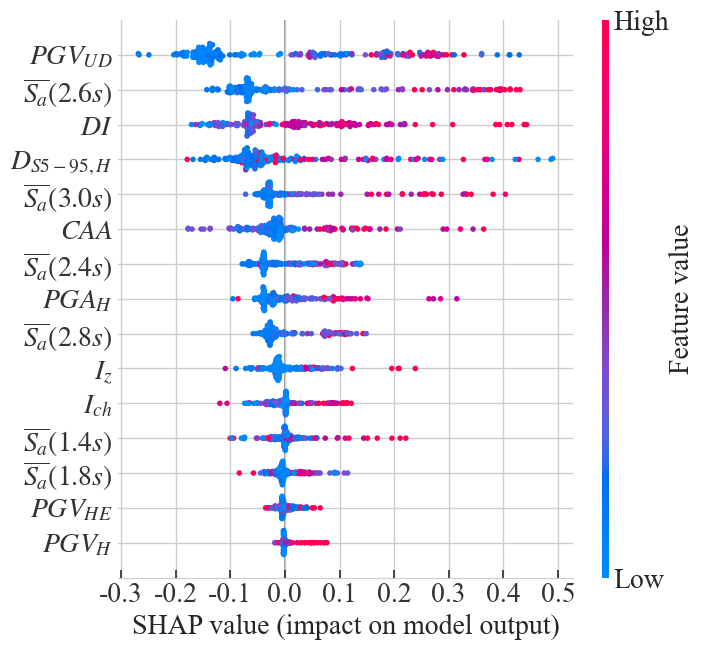

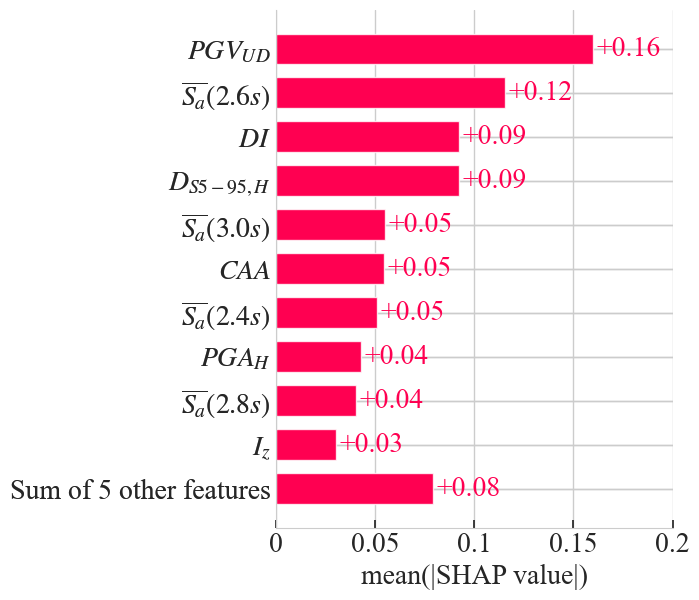

In [45]:
##HAP value impact plot and feature importanc
import shap

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams.update({
    'font.size': 40,        
    'axes.titlesize': 20,     
    'axes.labelsize': 40,
    'xtick.labelsize': 40,
    'ytick.labelsize': 40,
    'legend.fontsize': 20,
    'figure.titlesize': 20
})

 

IM_labels = {
    'PGA_H': r'$PGA_H$',
    'PGV_H': r'$PGV_H$',
    'PGV_UD': r'$PGV_{UD}$',
    'Sa0.8': r'$\overline{S_a}(0.8s)$',
    'Sa1.4': r'$\overline{S_a}(1.4s)$',
    'Sa1.8': r'$\overline{S_a}(1.8s)$',
    'Sa2.4': r'$\overline{S_a}(2.4s)$',
    'Sa2.6': r'$\overline{S_a}(2.6s)$',
    'Sa2.8': r'$\overline{S_a}(2.8s)$',
    'Sa3.0': r'$\overline{S_a}(3.0s)$',
    'AI': r'$AI$',
    'DI': r'$DI$',
    'Cav': r'$CAV $',
    'I_f': r'$I_f$',
    'I_v_r': r'$I_{v_r}$',
    'I_z': r'$I_z$',
    'I_ch': r'$I_{ch}$',
    'Dur_H595': r'$D_{S5-95,H}$',
    'PGV_HE': r'$PGV_{HE}$',
    'Caa': r'$CAA $',
}

feature_display_names = [IM_labels.get(f, f) for f in selected_features]

X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

xgb_model.fit(X_train_selected, y_train)

explainer = shap.Explainer(xgb_model, X_train_selected)
shap_values = explainer(X_train_selected)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_train_selected, feature_names=feature_display_names, show=False)

for text in plt.gcf().findobj(match=plt.Text):
    text.set_fontsize(20)  

plt.tight_layout()
plt.savefig("shap_summary.pdf", format="pdf", dpi=300, bbox_inches='tight')
plt.savefig("shap_summary.svg", format="svg", dpi=300, bbox_inches='tight')



custom_xticks = [0, 0.05, 0.1, 0.15, 0.2]
custom_labels = [str(x) for x in custom_xticks]  
plt.figure(figsize=(10, 6))
shap_values.feature_names = feature_display_names
bar_plot = shap.plots.bar(shap_values, max_display=11, show=False)

for text in bar_plot.get_figure().findobj(match=plt.Text):
    text.set_fontsize(20)

bar_plot.axes.set_xticks(custom_xticks)
bar_plot.axes.set_xticklabels(custom_labels, fontsize=20)

plt.tight_layout()
plt.savefig("shap_bar.pdf", format="pdf", dpi=300, bbox_inches='tight')
plt.savefig("shap_bar.svg", format="svg", dpi=300, bbox_inches='tight')

 



# fig 8

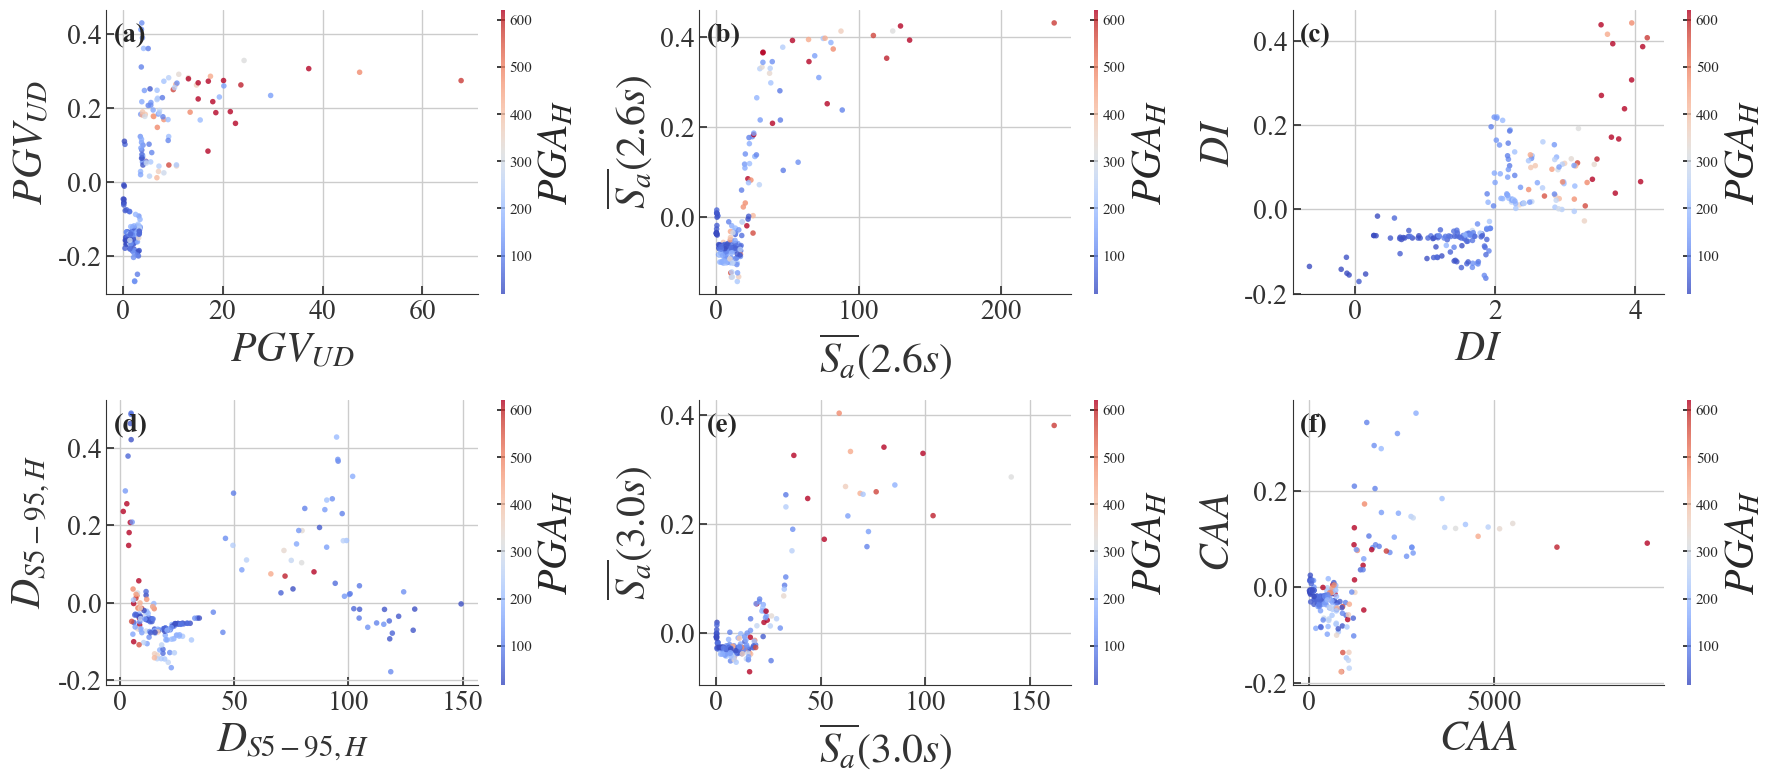

In [47]:
import shap
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
X_train_original, X_test_original, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, _, _ = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

best_n_features = num_features[np.argmax(r2_scores)]
rfe_best = RFE(estimator=xgb_model, n_features_to_select=best_n_features, step=1)
X_train_selected = rfe_best.fit_transform(X_train, y_train)
X_test_selected = rfe_best.transform(X_test)

selected_feature_indices = np.where(rfe_best.support_)[0]
selected_features = X.columns[selected_feature_indices].tolist()
X_train_selected_original = X_train_original.iloc[:, selected_feature_indices]  # 直接取未归一化数据
mpl.rcParams.update({
    'font.size': 13,
    'axes.titlesize': 14,
    'axes.labelsize': 13,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11
})

feature_labels = {
    'PGA_H': r'$PGA_H$',
    'PGV_H': r'$PGV_H$',
    'PGV_UD': r'$PGV_{UD}$',
    'Sa0.8': r'$\overline{S_a}(0.8s)$',
    'Sa1.4': r'$\overline{S_a}(1.4s)$',
    'Sa1.8': r'$\overline{S_a}(1.8s)$',
    'Sa2.4': r'$\overline{S_a}(2.4s)$',
    'Sa2.6': r'$\overline{S_a}(2.6s)$',
    'Sa2.8': r'$\overline{S_a}(2.8s)$',
    'Sa3.0': r'$\overline{S_a}(3.0s)$',
    'AI': r'$AI$',
    'DI': r'$DI$',
    'Cav': r'$CAV$',
    'I_f': r'$I_f$',
    'I_v_r': r'$I_{v_r}$',
    'I_z': r'$I_z$',
    'I_ch': r'$I_{ch}$',
    'Dur_H595': r'$D_{S5-95,H}$',
    'PGV_HE': r'$PGV_{HE}$',
    'Caa': r'$CAA$',
}

features_to_plot = ['PGV_UD', 'Sa2.6', 'DI', 'Dur_H595', 'Sa3.0', 'Caa']

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    shap.dependence_plot(
        feature,
        shap_values.values,
        X_train_selected_original,
        feature_names=selected_features,
        interaction_index='PGA_H',
        ax=axes[i],
        show=False,
        alpha=0.8,
        cmap='coolwarm'
    )

    ax = axes[i]
    ax.tick_params(labelsize=20)
    ax.set_xlabel(feature_labels.get(feature, feature), fontsize=30)
    ax.set_ylabel(f'  {feature_labels.get(feature, feature)}', fontsize=30)

    label = chr(ord('a') + i)
    ax.text(0.02, 0.95, f'({label})', transform=ax.transAxes,
            fontsize=20, fontweight='bold', va='top', ha='left')

    for obj in ax.get_children():
        if isinstance(obj, mpl.collections.PathCollection):
            try:
                cbar = obj.colorbar
                if cbar:
                    cbar.set_label(r'$PGA_H$', fontsize=30)
            except AttributeError:
                pass

plt.tight_layout()
plt.savefig("shap_dependence_plots.pdf", format="pdf", dpi=300, bbox_inches='tight')
plt.savefig("shap_dependence_plots.svg", format="svg", dpi=300, bbox_inches='tight')

